In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
income = pd.read_csv('adult_income.csv')

In [3]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
income.columns = income.columns.str.replace('.','_')

In [5]:
income['income_map'] = income.income.map({'<=50K':0, '>50K': 1})
income['sex_map'] = income.sex.map({'Female':0, 'Male':1})
income['race_map']=income.race.map({'White':0, 'Black':1, 
                                    'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3})
income['marital_map'] = income.marital_status.map({'Widowed':0, 'Divorced':1, 'Separated':2,
                                                  'Never-married':3, 'Married-civ-spouse':4,
                                                  'Married-spouse-absent':5, 'Married-AF-spouse':6})
income['rel_map']=income.relationship.map({'Not-in-family':0, 'Unmarried':0, 
                                           'Own-child':0, 'Other-relative':0, 
                                           'Husband':1, 'Wife':1})
income['work_map']=income.workclass.map({'?':0, 'Private':1, 'State-gov':2, 'Federal-gov':3, 
                                        'Self-emp-not-inc':4, 'Self-emp-inc': 5, 'Local-gov': 6,
                                        'Without-pay':7, 'Never-worked':8})

In [6]:
num_cols = ['age', 'sex_map', 'race_map','education_num', 'work_map', 
            'marital_map', 'rel_map', 'hours_per_week','capital_gain', 'capital_loss', 
            'fnlwgt', 'income_map']

In [7]:
income=income[num_cols].fillna(-9999)

In [8]:
income.head()

,age,sex_map,race_map,education_num,work_map,marital_map,rel_map,hours_per_week,capital_gain,capital_loss,fnlwgt,income_map
0,90,0,0.0,9,0,0,0,40,0,4356,77053,0
1,82,0,0.0,9,1,0,0,18,0,4356,132870,0
2,66,0,1.0,10,0,0,0,40,0,4356,186061,0
3,54,0,0.0,4,1,1,0,40,0,3900,140359,0
4,41,0,0.0,10,1,2,0,40,0,3900,264663,0


In [9]:
features=['age', 'sex_map', 'race_map','education_num', 'work_map', 
          'marital_map', 'rel_map', 'hours_per_week','capital_gain', 
          'capital_loss', 'fnlwgt']

target=['income_map']

In [10]:
x = income[features].values
y = income[target].values.flatten()

In [11]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [12]:
def dummy():
    
    # Creates a dummy classifier to always predict the more frequent class, 
    # in order to give us an idea about the existing class inbalance in our dataset.
    
    from sklearn.dummy import DummyClassifier
    from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(x,y)
    
    print('Dummy Classifier Accuracy Score: {:}'.format(dummy_clf.score(x_test, y_test)))

dummy()

Dummy Classifier Accuracy Score: 0.7565409654833558


###### . 

Due to a class imbalance in our dataset of approximately 75%/25% simply by predicting the most frequent class the dummy classifier can achieve an accuracy score of 76%.

# Logistic Regression

In [13]:
def logistic_regression():
    
    # Instantiates and trains a logistic regression model using grid search  
    # to find optimalhyperparameter values 
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    from sklearn.exceptions import FitFailedWarning
    import warnings
    warnings.simplefilter('always', FitFailedWarning)

    logreg = LogisticRegression()
    grid_values = {'penalty' : ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    
    grid_lr_rec = GridSearchCV(logreg, param_grid = grid_values, scoring = 'accuracy')
    with warnings.catch_warnings(record=True) as w:
       try:
         grid_lr_rec.fit(x, y)  # This will raise a ValueError since C is < 0
       except ValueError:
         pass
       return grid_lr_rec.best_estimator_   

In [14]:
logreg = logistic_regression()

# Decision Tree Classifier

In [15]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    
    grid_values = {'max_depth':np.arange(1,10), 'min_samples_leaf': np.arange(1,50,10)}
    clf = DecisionTreeClassifier()
    
    grid_dec_tree = GridSearchCV(clf, param_grid = grid_values)
    grid_dec_tree.fit(x, y)
    
    return grid_dec_tree.best_estimator_

In [16]:
clf_dec_tree = decision_tree()

# Random Forest Classifier

In [17]:
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    clf = RandomForestClassifier(random_state=0)
    grid_values = {'max_depth': np.arange(1,11,2), 'max_features': np.arange(1,11,2)}
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values)
    grid_clf.fit(x, y)
    
    
    return grid_clf.best_estimator_

In [18]:
rdm_forest_clf = random_forest()

# Gaussian Naive Bayes

In [19]:
def GaussianNB():
    from sklearn.naive_bayes import GaussianNB
    
    gaussian_nb = GaussianNB()
    
    gaussian_nb.fit(x, y)
    
    return gaussian_nb


In [20]:
clf_gnb = GaussianNB()

# Analysis of Income using the Machine learning Algorithms 

Evaluation

In [21]:
def evaluation(model):
    from sklearn.metrics import classification_report
    
    # This function gives provides verious evaluation metrics for the input model
    
    y_pred = model.predict(x_test)
    
    print(classification_report(y_test, y_pred, target_names = ['Under 50k', 'Over 50k']))
    print('Training Set Accuracy Score: {:.2f}'.format(model.score(x_train, y_train)))
    print('Testing Set Accuracy Score: {:.2f}'.format(model.score(x_test, y_test)))

In [22]:
print('Logical Regression')
evaluation(logreg)

Logical Regression
              precision    recall  f1-score   support

   Under 50k       0.81      0.97      0.88      6193
    Over 50k       0.72      0.27      0.39      1948

    accuracy                           0.80      8141
   macro avg       0.76      0.62      0.63      8141
weighted avg       0.79      0.80      0.76      8141

Training Set Accuracy Score: 0.80
Testing Set Accuracy Score: 0.80


In [23]:
print('Decision Tree')
evaluation(clf_dec_tree)

Decision Tree
              precision    recall  f1-score   support

   Under 50k       0.86      0.95      0.90      6193
    Over 50k       0.76      0.50      0.61      1948

    accuracy                           0.84      8141
   macro avg       0.81      0.73      0.76      8141
weighted avg       0.84      0.84      0.83      8141

Training Set Accuracy Score: 0.84
Testing Set Accuracy Score: 0.84


In [24]:
print ('Random Forest')
evaluation(rdm_forest_clf)

Random Forest
              precision    recall  f1-score   support

   Under 50k       0.86      0.95      0.90      6193
    Over 50k       0.76      0.51      0.61      1948

    accuracy                           0.84      8141
   macro avg       0.81      0.73      0.76      8141
weighted avg       0.84      0.84      0.83      8141

Training Set Accuracy Score: 0.84
Testing Set Accuracy Score: 0.84


In [25]:
print('Naive Bayes')
evaluation (clf_gnb)

Naive Bayes
              precision    recall  f1-score   support

   Under 50k       0.81      0.95      0.88      6193
    Over 50k       0.66      0.30      0.42      1948

    accuracy                           0.80      8141
   macro avg       0.74      0.63      0.65      8141
weighted avg       0.78      0.80      0.77      8141

Training Set Accuracy Score: 0.79
Testing Set Accuracy Score: 0.80


Confusion Matrix

In [26]:
def confusion(model):
    
    # Creats a confusion matrix/heatmap for the logistic regression models predicted values
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(x_test)
    confusion_mc = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(confusion_mc)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    n1=model.score(x_test, y_test)
    plt.title('Model Accuracy:{:.2%}'.format(round(n1,2)))

Logical regression


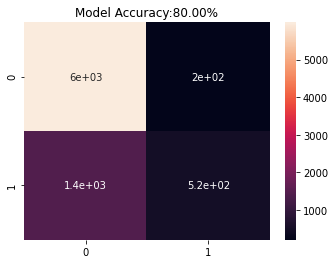

In [27]:
print ('Logical regression')
confusion(logreg)

Decision Tree


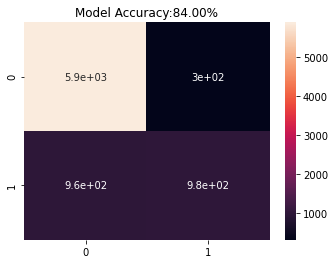

In [28]:
print ('Decision Tree')
confusion(clf_dec_tree)

Random Forest


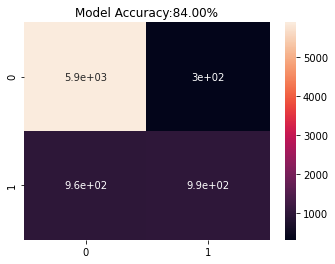

In [29]:
print ('Random Forest')
confusion(rdm_forest_clf)

Naive Bayes


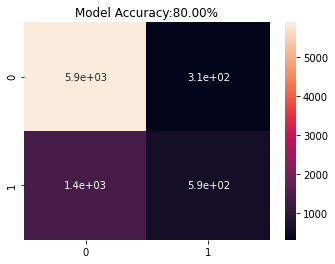

In [30]:
print ('Naive Bayes')
confusion(clf_gnb)

Precision-Recall

The Precision-Recall curve shows the trade off between precision and recall scores as we vary the decision threshold for classification (using either using either a probability threshold or a decision function threshold).

In [31]:
def precision_recall(model):
    from sklearn.metrics import precision_recall_curve
    
    proba = model.predict_proba(x_test)
    
    precision, recall, threshold = precision_recall_curve(y_test, proba[:,1])
    
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')

Logical Regression


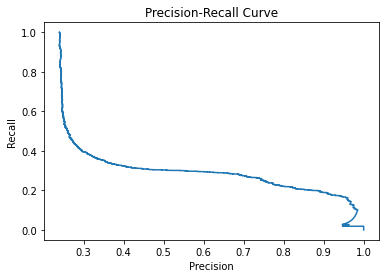

In [32]:
print ('Logical Regression')
precision_recall(logreg)

Decision Tree


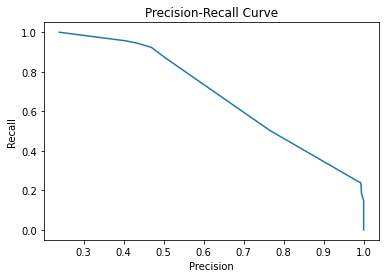

In [33]:
print ('Decision Tree')
precision_recall(clf_dec_tree)

Random Forest


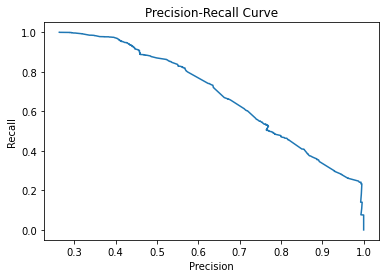

In [34]:
print ('Random Forest')
precision_recall(rdm_forest_clf)

Naive Bayes


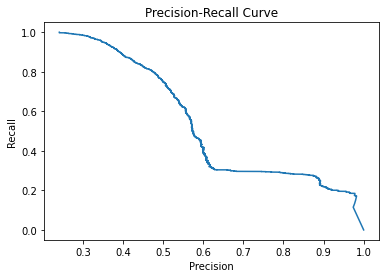

In [35]:
print ('Naive Bayes')
precision_recall(clf_gnb)

Roc Curve

The ROC curve (Receiver Operating Charastic) preforms the same feat for the True Positive Rate (recall) and the False Positive Rate. 

In [36]:
def roc_curve(model):
    from sklearn.metrics import roc_curve, auc
    
    #scores = model.decision_function(x_test)
    proba = model.predict_proba(x_test)
    
    fpr, tpr, _ = roc_curve(y_test, proba[:,1])
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))

Logical Regression


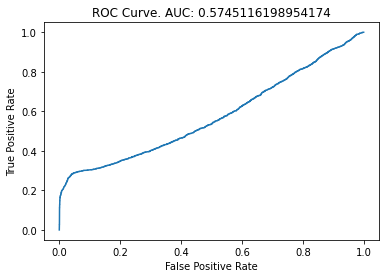

In [37]:
print ('Logical Regression')
roc_curve(logreg)

Decision Tree


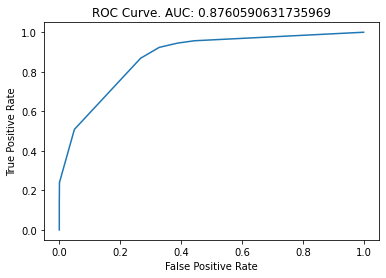

In [38]:
print ('Decision Tree')
roc_curve(clf_dec_tree)

Random Forest


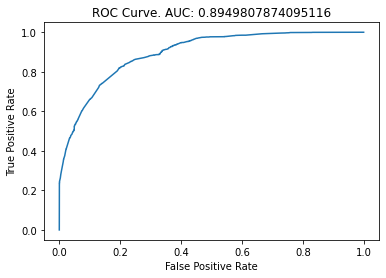

In [39]:
print ('Random Forest')
roc_curve(rdm_forest_clf)

Naive Bayes


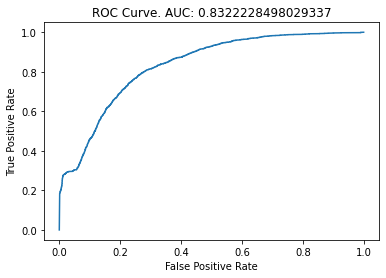

In [40]:
print ('Naive Bayes')
roc_curve(clf_gnb)

Micro Average and Macro Average

When the micro average (each instance has same weight) preforms better than the macro average (each class has same weight) this is an indicator that the model is preforming better on the more frequent class. This holds true with the results from the evaluation function above, in which the model performed substantially better on the class earning less than $50,000.

In [41]:
from sklearn.metrics import precision_score

y_pred = logreg.predict(x_test)
micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score for Logical Regression: {:}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score for Logical Regression: {:}'.format(
    precision_score(y_test, y_pred, average='macro')))

y_pred = clf_dec_tree.predict(x_test)
micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score for Decision Tree: {:}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score for Decision Tree: {:}'.format(
    precision_score(y_test, y_pred, average='macro')))

y_pred = rdm_forest_clf.predict(x_test)
micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score for Random Forest: {:}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score for Random Forest: {:}'.format(
    precision_score(y_test, y_pred, average='macro')))

y_pred = clf_gnb.predict(x_test)

micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score for Naive Bayes: {:}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score for Naive Bayes: {:}'.format(
    precision_score(y_test, y_pred, average='macro')))


Micro Average Precision Score for Logical Regression: 0.7995332268763051
Macro Average Precision Score for Logical Regression: 0.7636382552609765
Micro Average Precision Score for Decision Tree: 0.8442451787249724
Macro Average Precision Score for Decision Tree: 0.8118062668949002
Micro Average Precision Score for Random Forest: 0.844490848790075
Macro Average Precision Score for Random Forest: 0.8119618139829075
Micro Average Precision Score for Naive Bayes: 0.7956025058346641
Macro Average Precision Score for Naive Bayes: 0.7352554128496678


# Income Class of Adults (Above and Below 50k)

In [42]:
print('Number of instances in the > $50,000 class: {}'.format(
    len(income[income.income_map ==1])))
print('Number of instances in the < $50,000 class: {}'.format(
    len(income[income.income_map ==0])))

Number of instances in the > $50,000 class: 7841
Number of instances in the < $50,000 class: 24720
